In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Austin\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Part One

## Problem 1

Construct and code the linear OW model and nonlinear AFS model, and visualize the distribution of price impact based on the given data.

## OW model

In [304]:
df = pd.read_csv('merged_data.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df

,bid_fill,ask_fill,Signed Volume,price,best_bid,best_ask,mid_price
ts_event,,,,,,,
2024-10-22 08:00:00,801.0,1999.0,-1198.0,236.14,235.83,236.14,235.985
2024-10-22 08:00:01,201.0,202.0,-1.0,236.13,235.83,236.13,235.980
2024-10-22 08:00:02,1600.0,1400.0,200.0,235.83,235.83,236.11,235.970
2024-10-22 08:00:03,534.0,400.0,134.0,236.10,235.96,236.10,236.030
2024-10-22 08:00:04,400.0,502.0,-102.0,236.11,235.96,236.11,236.035
...,...,...,...,...,...,...,...
2024-10-22 23:58:59,32.0,0.0,32.0,235.54,235.54,235.81,235.675
2024-10-22 23:59:00,40.0,40.0,0.0,235.54,235.23,235.81,235.520
2024-10-22 23:59:37,0.0,1.0,-1.0,235.70,235.23,235.70,235.465


In [403]:
# ADV = np.mean(df['bid_fill'] + df['ask_fill'])
ADV = np.mean(df['Signed Volume'].abs())
ADV * 0.01

39.875582343812034

In [303]:
def h_OW(x, lambda_=0.4):
    return lambda_*x

def h_AFS(x, lambda_=0.4, p=0.5):
    return lambda_ * np.sign(x) * np.abs(x)**p

Text(0.5, 1.0, 'Distribution of Values')

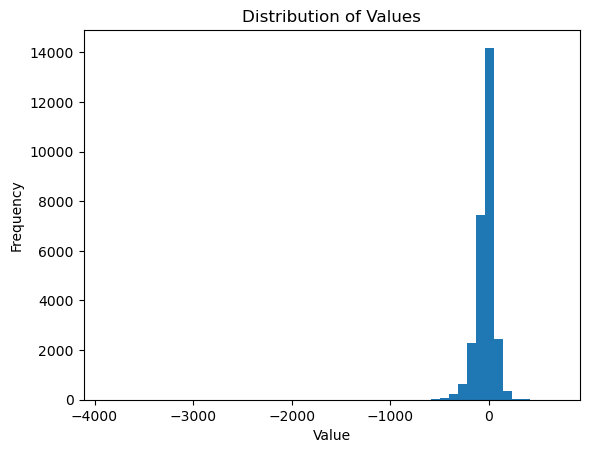

In [ ]:
# beta = 0.1
# dQ = df['Signed Volume'].to_numpy()
# # from nanosecond to year
# # T = ((df.index - df.index.min()).to_numpy() / 1e9).astype(float) / (252 * 24 * 60 * 60)
# T = ((df.index - df.index.min()).to_numpy() / 1e9).astype(float)


# price_impact = np.zeros(T.shape)
# for i in range(T.shape[0]):
#     dts = T[i] - T[:i+1]
#     K = np.exp(-beta * dts)
#     J = np.sum(K * dQ[:i+1])
#     I = h_OW(J, lambda_=0.0035)
#     price_impact[i] = I

# plt.hist(price_impact, bins=50)  # Adjust the number of bins as needed

# # Add labels and title
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('Distribution of Values')

We use the discretization formula (C.4):
$$ J_{t_n} = e^{-\beta \Delta t} (J_{t_{n-1}} + Q_n - Q_{n-1}) $$

Text(0.5, 1.0, 'Distribution of Price Impact')

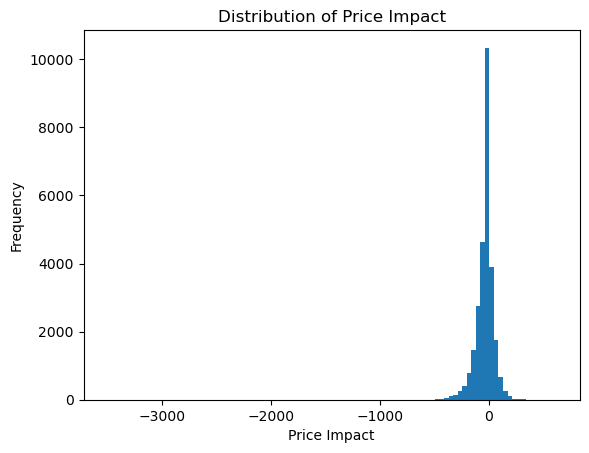

In [406]:
dQ = df.loc[:, 'Signed Volume'].to_numpy()
# nano second to seconds
# dt = (df.index.diff().to_numpy() / 1e9).astype(float) / (365.25 * 24 * 60 * 60) # to years
dt = (df.index.diff().to_numpy() / 1e9).astype(float)
dt[0] = 0
J = np.zeros(dt.shape)
J[0] = dQ[0]
I = np.zeros(dt.shape)

beta = 0.1
for i in range(1, T.shape[0]):
    J[i] = np.exp(-beta * dt[i]) * (J[i-1] + dQ[i])
    I[i] = h_OW(J[i], lambda_=0.0035)

plt.hist(I, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Price Impact')
plt.ylabel('Frequency')
plt.title('Distribution of Price Impact')

## AFS Model

Text(0.5, 1.0, 'Distribution of Price Impact')

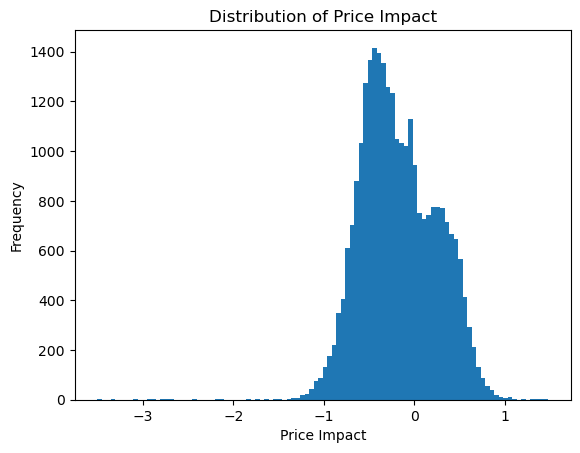

In [440]:
dQ = df.loc[:, 'Signed Volume'].to_numpy()
# nano second to seconds
# dt = (df.index.diff().to_numpy() / 1e9).astype(float) / (365.25 * 24 * 60 * 60) # to years
dt = (df.index.diff().to_numpy() / 1e9).astype(float)
dt[0] = 0
J = np.zeros(dt.shape)
J[0] = dQ[0]
I = np.zeros(dt.shape)

beta = 0.1
for i in range(1, T.shape[0]):
    J[i] = np.exp(-beta * dt[i]) * (J[i-1] + dQ[i])
    I[i] = h_AFS(J[i], lambda_=0.0035, p=0.5)

plt.hist(I, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Price Impact')
plt.ylabel('Frequency')
plt.title('Distribution of Price Impact')

# Part Two

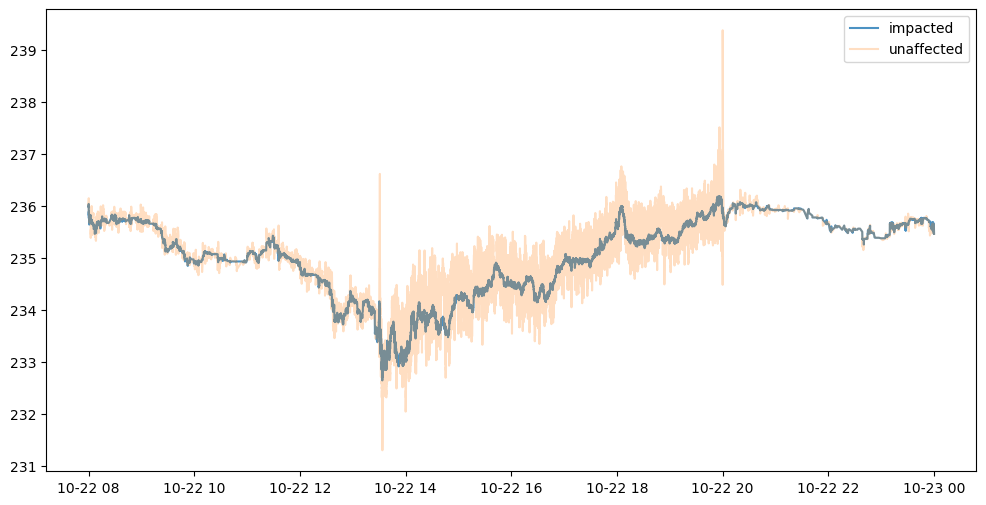

In [446]:
plt.figure(figsize=(12,6))
plt.plot(df['mid_price'], label='impacted', alpha=0.8)
plt.plot(df['mid_price'] - I, label='unaffected', alpha=0.25)
plt.legend()

(4.2): $ Q^{\star}_{t_n} = C_f f_{t_n} - C_J J_{t_n} $ 

(C.4): $ J_{t_n} = e^{-\beta \Delta t} (J_{t_{n-1}} + Q_{t_n} - Q_{t_{n-1}}) $

Plug (C.4) into (4.2), we have
$$ J_{t_n} = \frac{e^{-\beta \Delta t}}{1 + C_J e^{-\beta \Delta t}} \left( J_{t_{n-1}} + C_f f_{t_n} - Q_{t_{n-1}} \right) $$

In [466]:
# nano second to seconds
dt = (df.index.diff().to_numpy() / 1e9).astype(float)
dt[0] = 0
S = np.zeros(dt.shape)
f = np.zeros(dt.shape)
Q_star = np.zeros(dt.shape)
J = np.zeros(dt.shape)
dW = np.random.standard_normal(dt.shape)
dB = np.random.standard_normal(dt.shape)

alpha = 1.67 * 1e-4
beta = 2
gamma = 0.1
sigma = 0.02
lambda_ = 0.0035 # page 10 (section 6.1)
phi = 5/365 # page 9 (section 6.1)

Cf = (alpha*(1+beta/phi)) / ((gamma*sigma**2) * (np.sqrt(1+((2*lambda_*beta)/(gamma*sigma**2))) + beta/phi))
Cj = np.sqrt(1 + ((2*lambda_*beta)/(gamma*sigma**2))) - 1

for i in range(1, dt.shape[0]):
    S[i] = S[i-1] + alpha * f[i-1] * dt[i] + sigma * np.sqrt(dt[i]) * dB[i]
    f[i] = np.exp(-phi * dt[i]) * f[i-1] + np.sqrt(1 - np.exp(-2 * phi * dt[i])) * dW[i] # (C.6)
    J[i] = np.exp(-beta * dt[i]) / (1+Cj * np.exp(-beta * dt[i])) * (J[i-1] + Cf * f[i] - Q_star[i-1])
    Q_star[i] = Cf * f[i] - Cj * J[i]

In [ ]:
# fig, ax1 = plt.subplots(figsize=(12,5))

# ax1.plot(df.index, S, color='blue')
# ax1.set_xlabel('Timing')
# ax1.set_ylabel('S', color='blue')

# ax2 = ax1.twinx()
# ax2.plot(df.index, Q_star, color='red', alpha=0.4)
# ax2.axhline(0, color='red', linestyle='--')
# ax2.set_ylabel('Q_star', color='red')

# # Show the plot
# plt.title('S and Q_star over Time')
# plt.show()

In [467]:
def compute_pnl(S, Q_star, J, lambda_):
    pnl = np.zeros(S.shape)
    I = np.zeros(S.shape)
    execution_cost = 0

    for i in range(1, S.shape[0]):
        # I[i] = h_AFS(J[i], lambda_=lambda_)
        I[i] = h_OW(J[i], lambda_=lambda_)
        execution_cost += (S[i]+I[i]) * (Q_star[i] - Q_star[i-1])
        pnl[i] = Q_star[i] * S[i] - execution_cost

    return pnl

# Calculate PnL
pnl = compute_pnl(S, Q_star, J, lambda_)

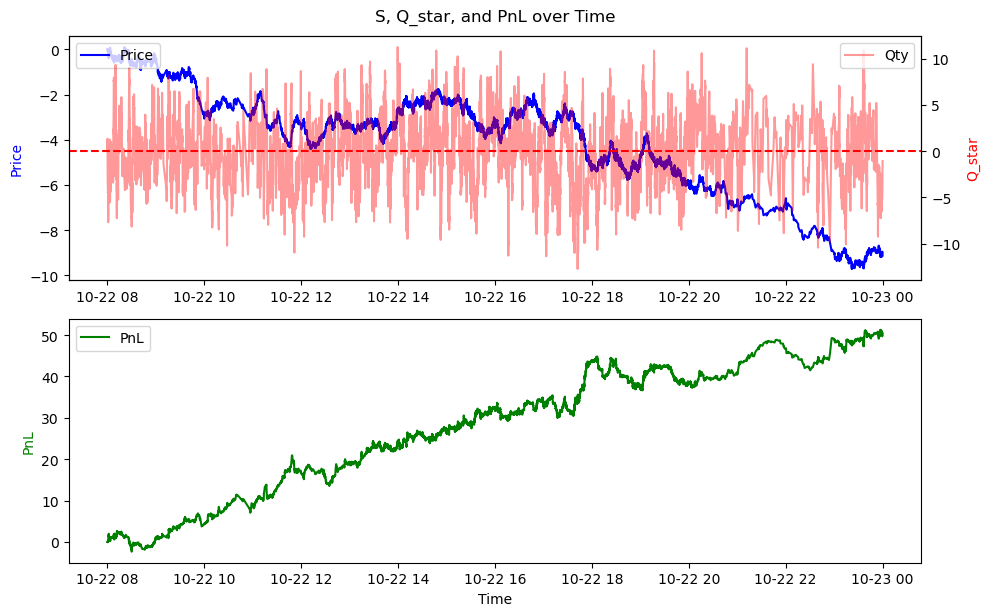

In [478]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(10, 6))

ax1.plot(df.index, S, color='blue', label='Price')
# ax1.set_xlabel('Timing')
ax1.set_ylabel('Price', color='blue')

ax2 = ax1.twinx()
ax2.plot(df.index, Q_star, color='red', alpha=0.4, label='Qty')
ax2.axhline(0, color='red', linestyle='--')
ax2.set_ylabel('Q_star', color='red')

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot PnL in the second subplot
ax3.plot(df.index,pnl, color='green', label='PnL')
ax3.set_xlabel('Time')
ax3.set_ylabel('PnL', color='green')
ax3.legend(loc='upper left')

plt.tight_layout()

# Add a title
plt.suptitle('S, Q_star, and PnL over Time', y=1.02)
plt.show()

In [472]:
unit_time_pnl = (pnl[1:] - pnl[:-1]) / dt[1:]
expected_return = np.mean(unit_time_pnl)
risk = np.std(unit_time_pnl)
sharpe_ratio = expected_return / risk
sharpe_ratio / np.mean(dt[1:]) * np.sqrt(365*16*60*60) # 16 hours

23.294995820000157

# Part Three

In [480]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class NetPower(nn.Module):
    def __init__(self, input_dim=2, output_dim=1, p=1, B=0.01):
        super(NetPower, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 8)
        self.fc4 = nn.Linear(8, output_dim)
        self.relu = nn.ReLU()
        self.p = p
        self.B = B
        self.a, self.b = self.calibrate_linear_extension(p, B)

    def forward(self, f, J_prev):
        x = torch.cat([f, J_prev], dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        Q = self.NL(x) - J_prev
        return Q
    
    def NL(self, x):
        return torch.where(
            torch.abs(x) < self.B,
            torch.sign(x) * torch.pow(torch.abs(x), 1 / self.p),
            self.a * x + torch.sign(x) * self.b
        )

    def calibrate_linear_extension(self, p, B):
        a = (1 / p) * torch.pow(torch.abs(torch.tensor(B)), (1 - p) / p)
        b = (1 - 1 / p) * torch.pow(torch.abs(torch.tensor(B)), 1 / p)
        return a, b

model = NetPower(p=0.5, B=1e6)

f = torch.randn(1, 1)
J_prev = torch.randn(1, 1)
Q = model(f, J_prev)
print(Q)

tensor([[0.6054]], grad_fn=<SubBackward0>)


In [ ]:
class NetSimple(nn.Module):
    def __init__(self, input_dim=2, output_dim=1):
        super(NetSimple, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 8)
        self.fc4 = nn.Linear(8, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return self.fc4(x)

class NetLinear(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NetLinear, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

In [494]:
torch.normal(mean=0, std=1, size=(batch_size, N))

tensor([[-0.0233,  0.1399,  0.8559,  ...,  0.1425, -0.4247, -1.4983],
        [-1.1158,  2.6923, -0.3107,  ...,  0.0859, -0.1097,  0.0650],
        [-0.8343, -1.5291,  0.5484,  ...,  1.7720,  1.0044,  2.2523],
        ...,
        [-0.3168,  0.2842,  0.0916,  ...,  0.5968,  1.2222,  0.7382],
        [ 0.9381,  1.4871, -0.4835,  ..., -0.9877, -0.6150,  0.7959],
        [ 0.5934,  0.7133, -1.7798,  ..., -0.3917,  0.0346,  2.2863]])

In [498]:
torch.randn(batch_size, N)

tensor([[-0.1576,  1.2574, -1.3583,  ..., -0.2947,  1.2903, -1.1175],
        [-1.6881, -1.2049,  1.4172,  ..., -2.2624,  1.1341, -1.4938],
        [-0.2333, -1.9401,  1.1735,  ...,  0.0975, -0.4339, -1.6589],
        ...,
        [-0.6065,  0.7171,  1.3441,  ..., -0.0430, -1.1244,  0.4258],
        [-1.1427,  1.5169,  0.8083,  ...,  0.0827,  0.0376,  1.1129],
        [ 0.0383,  0.3091, -1.2214,  ..., -0.2668, -1.0365, -1.0562]])

In [506]:
p = 0.5
Delta_t = torch.tensor([0.01]) #100 trades per day
alpha_hat = alpha * (1-torch.exp(-beta * Delta_t)) / (beta * Delta_t)
lambda_hat = lambda_ * (1-torch.exp(-beta * (p+1) * p * Delta_t)) / (beta * (p+1) * Delta_t)
# Hyperparameters
input_dim = 2  # (f_{n-1}, J^0_{n-1})
output_dim = 1  # Q^{theta_n}
lr = 0.001
num_epochs = 50
batch_size = 64
N = 5120

model = NetPower(p=p, B=1e6)  # or NetSimple() or NetLinear()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

# Training loop
for epoch in range(num_epochs):
    # Generate a batch of simulated trading signals (f_n-1)
    # f = torch.randn(batch_size, N, 1)  # Replace with your signal generation
    dW = torch.normal(mean=0, std=1, size=(batch_size, N))
    f = torch.zeros((batch_size, N))
    for i in range(1, N):
        f[:,i] = torch.exp(-phi * Delta_t) * f[:,i-1] + torch.sqrt(1 - torch.exp(-2 * phi * Delta_t)) * dW[:,i] # (C.6)
    f = f.unsqueeze(-1)

    # Initialize J_prev and Q
    J_prev = torch.zeros(batch_size, 1)
    Q = torch.zeros(batch_size, N, 1)

    # Q_n and J_n for each time step
    for n in range(N):
        Q[:, n, :] = model(f[:, n, :], J_prev) # (C.14)
        J_0 = torch.exp(-beta * Delta_t) * J_prev - (1 - torch.exp(-beta * Delta_t)) * Q[:, n, :] # (C.15)
        J = Q[:, n, :] + J_0 # (C.16)
        J_prev = J

    # objective function (C.17)
    pnl = alpha_hat * torch.sum(Q * f, dim=1)
    risk = (gamma * sigma**2) / 2 * torch.sum(Q**2, dim=1)
    impact_cost = lambda_hat * beta * torch.sum(torch.abs(J)**(p + 1), dim=1)
    objective = torch.mean(pnl - risk - impact_cost)

    # Backpropagation
    optimizer.zero_grad()
    (-objective).backward()  # Negative since we're maximizing
    optimizer.step()

    # Print progress or log metrics
    print(f"Epoch {epoch+1}/{num_epochs}, Objective: {objective.item()}")

Epoch 1/50, Objective: 6.59888974041678e-05


KeyboardInterrupt: 

In [505]:
f.unsqueeze(-1)

tensor([[[ 0.0000e+00],
         [ 1.1212e-02],
         [ 2.5352e-02],
         ...,
         [-8.9645e-01],
         [-8.8221e-01],
         [-8.8178e-01]],

        [[ 0.0000e+00],
         [-1.0817e-04],
         [ 1.6027e-02],
         ...,
         [-1.2962e+00],
         [-1.3032e+00],
         [-1.3148e+00]],

        [[ 0.0000e+00],
         [ 7.4131e-03],
         [ 1.2981e-02],
         ...,
         [-2.8509e-01],
         [-2.7859e-01],
         [-2.8240e-01]],

        ...,

        [[ 0.0000e+00],
         [ 9.5583e-03],
         [-1.0094e-02],
         ...,
         [-1.0411e+00],
         [-1.0553e+00],
         [-1.0468e+00]],

        [[ 0.0000e+00],
         [-1.9434e-02],
         [-3.3817e-02],
         ...,
         [-1.5466e+00],
         [-1.5276e+00],
         [-1.5315e+00]],

        [[ 0.0000e+00],
         [-3.3329e-02],
         [-1.5500e-02],
         ...,
         [ 9.3667e-01],
         [ 9.2602e-01],
         [ 9.5306e-01]]])

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.integrate import quad
import scipy.integrate as integrate

# Loading the data from the uploaded file
file_path = "merged_data.csv"  # Path to the uploaded data file
data = pd.read_csv(file_path)
# Displaying the first few rows of the data to understand its structure
data.head()

,ts_event,bid_fill,ask_fill,Signed Volume,price,best_bid,best_ask,mid_price
0,2024-10-22 08:00:00,801.0,1999.0,-1198.0,236.14,235.83,236.14,235.985
1,2024-10-22 08:00:01,201.0,202.0,-1.0,236.13,235.83,236.13,235.980
2,2024-10-22 08:00:02,1600.0,1400.0,200.0,235.83,235.83,236.11,235.970
3,2024-10-22 08:00:03,534.0,400.0,134.0,236.10,235.96,236.10,236.030
4,2024-10-22 08:00:04,400.0,502.0,-102.0,236.11,235.96,236.11,236.035


In [281]:
### parameters
beta_values = [0.01, 0.1, 1.0]  # Larger magnitude differences for decay rates
lambda_values = [0.3, 0.5, 0.8]  # Keeping lambda values consistent

# Converting timestamp to datetime and calculating time deltas
data['timestamp'] = pd.to_datetime(data['ts_event'])
data['time_delta'] = (data['timestamp'] - data['timestamp'].min()).dt.total_seconds()
data['cumulative_volume'] = data['Signed Volume'].cumsum()

In [284]:
time_differences

array([5.7597e+04, 5.7596e+04, 5.7595e+04, ..., 2.0000e+01, 1.6000e+01,
       0.0000e+00])

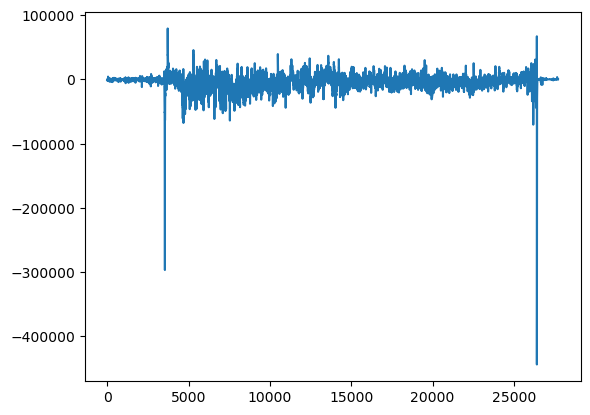

In [283]:
beta = 0.1
lambda_ = 0.4
price_impact = np.zeros(len(time_delta))
for k in range(len(time_delta)):
    time_differences = time_delta[k] - time_delta[:k+1]
    weights = np.exp(-beta * time_differences)
    price_impact[k] = lambda_ * np.sum(weights * signed_volume[:k+1])

plt.plot(price_impact)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

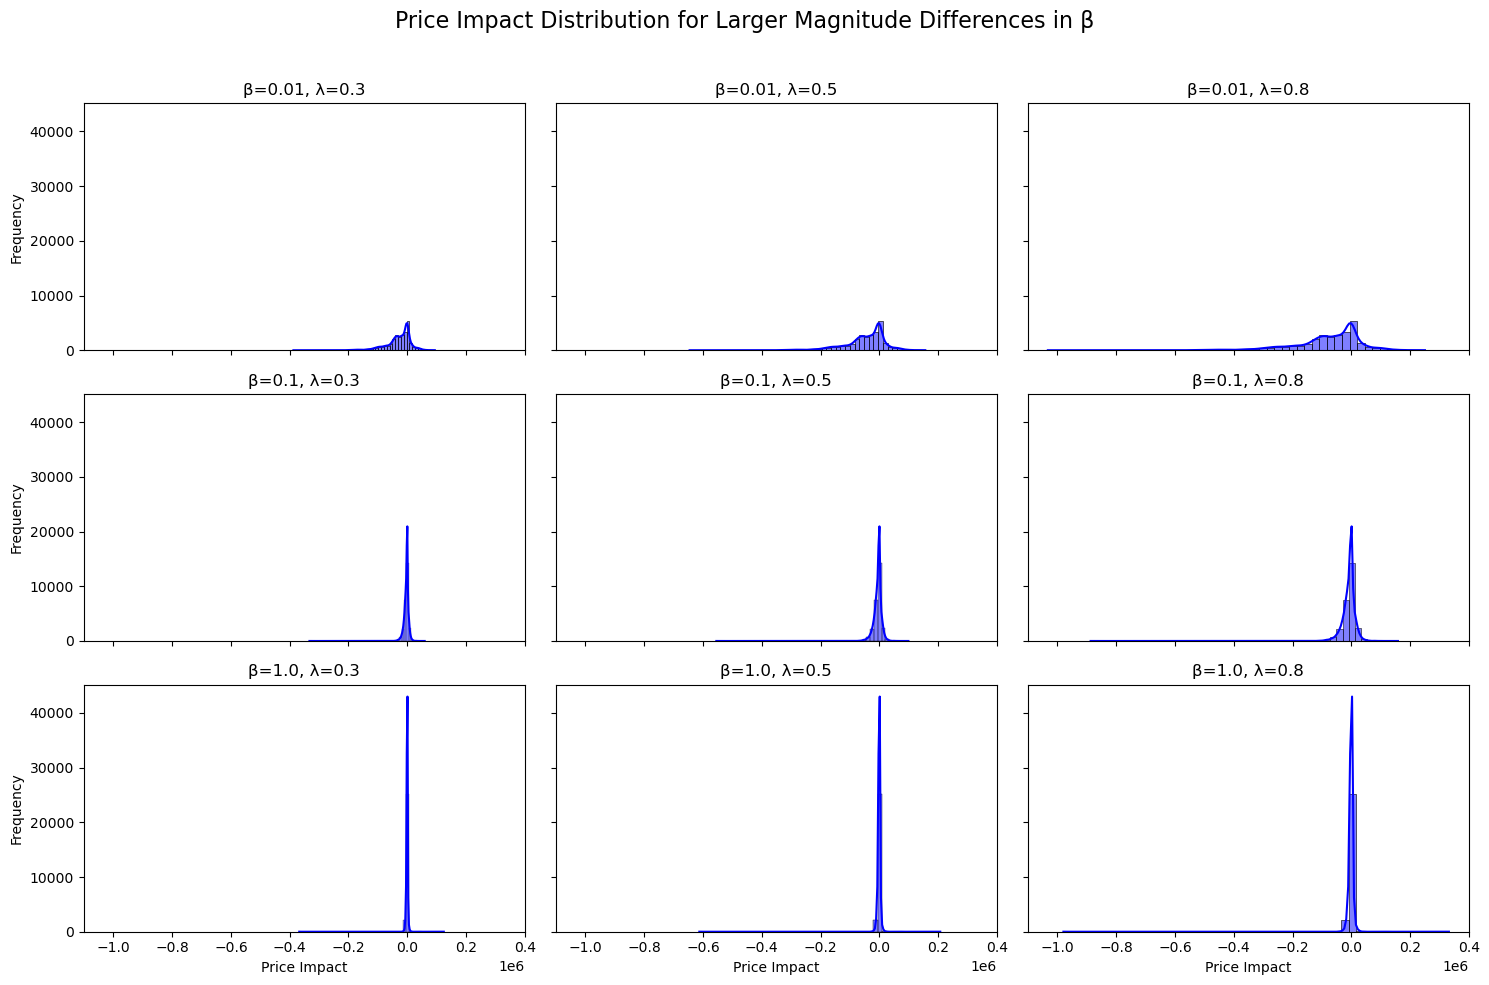

In [282]:
time_delta = data['time_delta'].values
signed_volume = data['Signed Volume'].values

# Create grid plots
fig, axes = plt.subplots(len(beta_values), len(lambda_values), figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Price Impact Distribution for Larger Magnitude Differences in β', fontsize=16)

# Compute and visualize price impacts
for i, beta in enumerate(beta_values):
    for j, lambda_ in enumerate(lambda_values):
        # Compute price impact for the current combination
        price_impact = np.zeros(len(time_delta))
        for k in range(len(time_delta)):
            time_differences = time_delta[k] - time_delta[:k+1]
            weights = np.exp(-beta * time_differences)
            price_impact[k] = lambda_ * np.sum(weights * signed_volume[:k+1])

        # Plot the price impact distribution
        ax = axes[i, j]
        sns.histplot(price_impact, bins=50, kde=True, ax=ax, color='blue')
        ax.set_title(f'β={beta}, λ={lambda_}', fontsize=12)
        ax.set_xlabel('Price Impact', fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()